<b style="font-size: 32px" > MIS HW 2

<b style="font-size: 26px"> Group 12 

<b style="font-size: 18px"> Apurva Audi, Vivek Dhulipalla, Kshitij Mahajan 

In [52]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

In [53]:
df = pd.read_csv("NYC_Restaurants.csv",dtype=str)
df.head()
#len(df.columns)
df.columns
len(df)

44633

#### Q.1. Create a unique name for each restaurant
On the DataFrame created above, add a new column to your DataFrame, called ’RESTAURANT’, that combines DBA, BUILDING, STREET, ZIPCODE,and BORO fields. For example, “WENDY’S 469 FLATBUSH AVENUE 11225 BROOKLYN”. Print the first 10 values of the RESTAURANT column of your DataFrame.

In [54]:
df['RESTAURANT'] = df[['DBA','BUILDING','STREET','ZIPCODE']].apply(lambda x: " ".join(x),axis = 1)
df['RESTAURANT'][:10]

0                    WENDY'S 469 FLATBUSH AVENUE 11225
1                    WENDY'S 469 FLATBUSH AVENUE 11225
2                    WENDY'S 469 FLATBUSH AVENUE 11225
3                    WENDY'S 469 FLATBUSH AVENUE 11225
4                    WENDY'S 469 FLATBUSH AVENUE 11225
5               TOV KOSHER KITCHEN 97-22 63 ROAD 11374
6               TOV KOSHER KITCHEN 97-22 63 ROAD 11374
7               TOV KOSHER KITCHEN 97-22 63 ROAD 11374
8               TOV KOSHER KITCHEN 97-22 63 ROAD 11374
9    BRUNOS ON THE BOULEVARD 8825 ASTORIA BOULEVARD...
Name: RESTAURANT, dtype: object

#### Q.2. How many restaurants are included in the data? 
Careful now:
• A “Subway” in one particular address (i.e., building, street, zipcode,
and boro) counts as one restaurant; don’t combine all Subways into
one restaurant!
• The data can have multiple violations for the same restaurant!

In [55]:
res_mask = df['RESTAURANT'].unique()
print("Total Number of Restaurants : ",len(res_mask))

Total Number of Restaurants :  10114


#### Q.3. How many chains are there? 
Let us define a chain to be the same restaurant name occurring in at least two different (building, street, zipcode, boro) addresses (i.e., one DBA with multiple restaurant locations).
You’ll see multiple versions of the name ”DUNKIN DONUTS”. Just act as if they are different chains.

In [56]:
df_uniq_res = df.drop_duplicates(subset='RESTAURANT')
chains_mask = df_uniq_res['DBA'].value_counts().values > 1
chains_mask.sum()                                                 

368

#### Q.4.Plot a bar graph of the top 20 most popular chains.
We already have the chains from the previous problem. Count the number of restaurants for each chain as a measure of its popularity.

<AxesSubplot:>

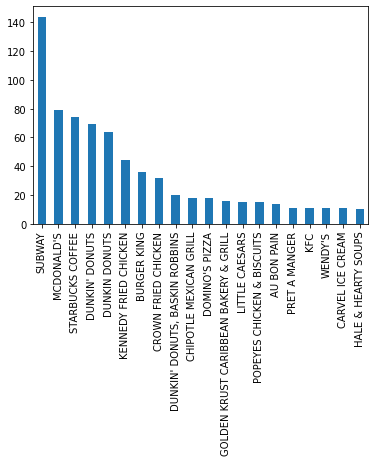

In [57]:
df_uniq_res['DBA'].value_counts()[:20].plot(kind='bar')

#### Q.5. What fraction of all restaurants are chain restaurants?
You should think of a restaurant as being one restaurant at one location. So “Wendy’s 5th Street” and “Wendy’s on 10th Street” are two different restaurants. Essentially a restaurant is what you defined in Q1.

In [58]:
'''
Using the dataframe referring to the unique restaurants based on address.
Computing the actual sum of restaurants for which the sum is more than 1.
'''
non_chains= sum(df_uniq_res['DBA'].value_counts()==1)
chain_res_fraction = (len(res_mask) - non_chains)/len(res_mask)

print("Fraction of all restaurants which are chain restaurants : ", chain_res_fraction)

Fraction of all restaurants which are chain restaurants :  0.16472216729286138


#### Q.6. Plot the number of non-chain restaurants in each boro. 
First, we need to figure out all the non-chain restaurants, then select out only those restaurants, and finally plot the number of such restaurants by boro. Make sure to look at the plot; we don’t want to see... oh... the “missing” boro.

<AxesSubplot:>

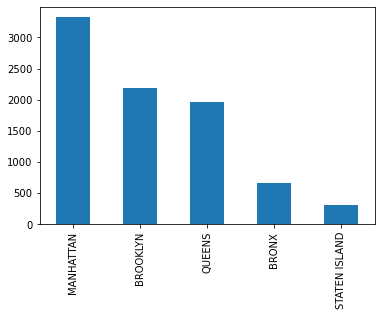

In [59]:
#Replacing 'Missing' Borough names with NaN values
df_uniq_res= df_uniq_res.replace('Missing',np.nan)

# #Dropping rows with NaN values
df_uniq_res.dropna()

# #Creating unique mask for restaurants to find non-chain restaurants - value would be 1 for them
uniq_mask = (df_uniq_res['DBA'].value_counts() == 1)

#Creating dataframe using value_counts() output as a dictionary
df_non_chain = pd.DataFrame({'DBA':uniq_mask.index, 'is_non_chain':uniq_mask.values})


#Adding a column using apply function to assign True - non-chain restaurants value of 1.
df_non_chain['is_non_chain']= df_non_chain['is_non_chain'].apply(lambda x : 1 if x == True else 0)

#Merging the dataframe created with mask with the unique restaurant list using the DBA column.
uniq_res_merge = df_uniq_res.merge(df_non_chain,left_on='DBA',right_on='DBA')

#Selecting all non-chain columns to group with their respective BORO.
uniq_res_merge['BORO'][uniq_res_merge['is_non_chain'] == 1].value_counts().plot(kind='bar')

#### Q.7.Plot the fraction of non-chain restaurants in each boro. 
The boro with the most non-chain restaurants might just be the boro with the most restaurants in general. If we want to find the boro that attracts the most “independent” restauranteurs, we must divide the number of non-chain restaurants by the total number of restaurants in the boro. Plot this.
Is the boro with the most independent restaurants also the one with the highest ratio of independent restaurants?

<AxesSubplot:>

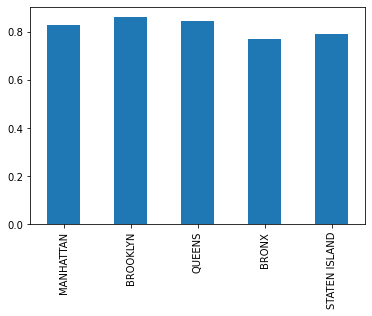

In [60]:
total_non_chain = uniq_res_merge['BORO'].value_counts()
non_chain_res = uniq_res_merge['BORO'][uniq_res_merge['is_non_chain'] == 1].value_counts()
(non_chain_res/total_non_chain).plot(kind='bar')

#### Q.8. Plot the popularity of cuisines. 
Which cuisines are the most well-represented among all restaurants? Define the popularity of a cuisine as the number of restaurants serving that cuisine. Plot the popularity of the top 20 cuisines.

<AxesSubplot:>

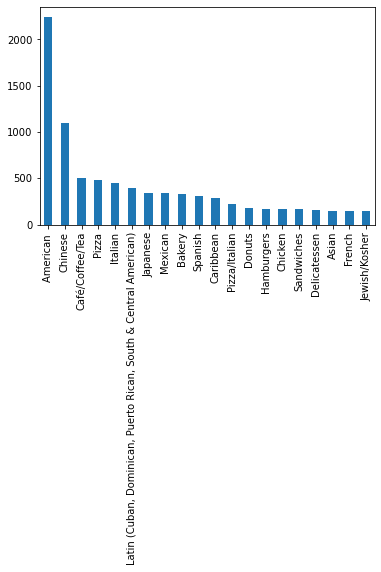

In [61]:
#Using uniq_res_merge dataframe which contains list of unique restaurants - 'DBA' and 'RESTAURANT' unique pairs.
uniq_res_merge['CUISINE DESCRIPTION'].value_counts()[:20].plot(kind='bar')

#### Q.9.Plot the cuisines among restaurants which never got cited for violations. 
Ideally, you should explore and see what happens when there is no violation, but here I will just tell you: the ’VIOLATION
CODE’ field is missing. First, find the restaurants that were never cited for a code violation. The compute the popularity of each cuisine among these “clean” restaurants. Plot the popularity of the top-20 among these cuisines.

<AxesSubplot:>

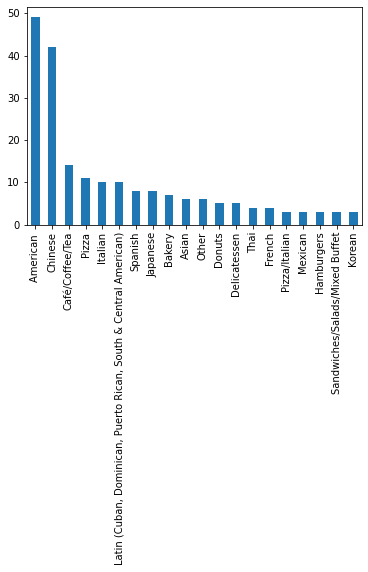

In [74]:
df['VIOLATION FLAG'] = np.where(df['VIOLATION CODE'].isna(), 0, 1)
res = df.groupby(['RESTAURANT'])['VIOLATION FLAG'].sum()
df_no_violation = df[df['RESTAURANT'].isin(res[res.values == 0].index)][['CUISINE DESCRIPTION','RESTAURANT']].drop_duplicates()
df_res = df_no_violation['CUISINE DESCRIPTION'].value_counts()
df_res[:20].plot(kind='bar')

#### Q.10. What cuisines tend to be the “cleanest”?
• Select all cuisines for which there were at least 20 restaurants representing that cuisine.
• For each such cuisine, compute the ratio of the counts in Q9 to Q8.This is the ratio of restaurants that never got cited, versus total number of restaurants, for each cuisine.
• Find the top-10 cuisines with the highest ratios; these are that cuisines whose restaurants are “most likely to be clean.”

In [76]:
every_cuisine = df.drop_duplicates('RESTAURANT')['CUISINE DESCRIPTION'].value_counts()
mask=(every_cuisine >=20)
clean_cuisine=df_no_violation['CUISINE DESCRIPTION'].value_counts()

Output=clean_cuisine[mask]/every_cuisine[mask]

Output=Output.sort_values(ascending= False)
print(Output[0:20])

Soul Food                         0.090909
Vietnamese/Cambodian/Malaysia     0.062500
Other                             0.058252
Soups & Sandwiches                0.047619
Continental                       0.047619
Barbecue                          0.047619
Asian                             0.041096
Chinese                           0.038251
Greek                             0.036364
Peruvian                          0.035714
Tex-Mex                           0.034483
Delicatessen                      0.032680
Thai                              0.031250
Sandwiches/Salads/Mixed Buffet    0.028571
Bagels/Pretzels                   0.028571
Irish                             0.028571
Turkish                           0.028571
Chinese/Japanese                  0.028571
Donuts                            0.028409
Café/Coffee/Tea                   0.028112
Name: CUISINE DESCRIPTION, dtype: float64


<b>Q.11.What are the most common violations in each borough?</b>

Create a table of the number of times each violation description was observed in each borough, and figure out the most common violation description for each borough. To create the table, check out the crosstab function. We will see a more general version of this when we discuss groupby in class. Once you do have the table, you will still need to find the most common violation description for each boroug .


In [15]:
remove_missing= df[df['BORO']!='Missing']
violation_boro = pd.crosstab(index=remove_missing['VIOLATION DESCRIPTION'],columns = remove_missing['BORO'])
violation_boro



BORO,BRONX,BROOKLYN,MANHATTAN,QUEENS,STATEN ISLAND
VIOLATION DESCRIPTION,,,,,
"Choking first aid poster not posted. Alcohol and pregnancy warning sign not posted. Resuscitation equipment: exhaled air resuscitation masks (adult & pediatric), latex gloves, sign not posted. Inspection report sign not posted.",12,40,49,29,5
''''No Smoking and/or 'Smoking Permitted sign not conspicuously posted. Health warning not present on 'Smoking Permitted,1,5,6,4,1
''''Wash hands sign not posted at hand wash facility.,21,57,93,60,8
"A food containing artificial trans fat, with 0.5 grams or more of trans fat per serving, is being stored, distributed, held for service, used in preparation of a menu item, or served.",5,12,19,24,3
Accurate thermometer not provided in refrigerated or hot holding equipment.,21,76,98,92,16
...,...,...,...,...,...
Toilet facility not provided for employees or for patrons when required.,2,3,11,3,1
Toilet facility used by women does not have at least one covered garbage receptacle.,1,5,7,2,1
"Toxic chemical improperly labeled, stored or used such that food contamination may occur.",2,8,15,20,3


In [16]:

Violation_Boro_max=violation_boro.max()
Violation_Boro_new=violation_boro.idxmax()
Output=pd.concat([Violation_Boro_max,Violation_Boro_new],axis=1)
print("The most common violation description for each borough"+"\n",Output)

The most common violation description for each borough
                   0                                                  1
BORO                                                                  
BRONX           500  Non-food contact surface improperly constructe...
BROOKLYN       1485  Non-food contact surface improperly constructe...
MANHATTAN      2417  Non-food contact surface improperly constructe...
QUEENS         1416  Non-food contact surface improperly constructe...
STATEN ISLAND   230  Non-food contact surface improperly constructe...


<b>Q.12.What are the most common violations per borough,after normalizing for the relative abundance of each violation?</b>

Hopefully, the answer to the previous question left you unsatisfied, because some violations are just very common,irrespective of borough. A better approach would be to normalize the violation counts, as follows.•Get overall frequencies: Figure out how common each violation is, over the entire dataset; let’s call this violationFrequency.•Normalize: Consider the table of number of violations by boro that you created for the previous question. For each borough, divide the number of violations of each type by the total number of violations for
that type; i.e., divide the series of violations by violationFrequency. We want to do this for each borough. •Find the biggest violations: Now, after this normalization, for each borough, figure out the most common violation description.

In [17]:

frequency = df['VIOLATION DESCRIPTION'].value_counts()


In [18]:
df1=pd.DataFrame(violation_boro)

def normalization(value):
    
    return (value/frequency)

Final_Violation_Boro = violation_boro.apply(normalization)
Final_Violation_Boro_max=Final_Violation_Boro.max()
Final_Violation_Boro_new=Final_Violation_Boro.idxmax()
Output=pd.concat([Final_Violation_Boro_max,Final_Violation_Boro_new],axis=1)
print("The most common violation description for each borough"+"\n",Output)


The most common violation description for each borough
                       0                                                  1
BORO                                                                      
BRONX          0.500000                        Unprotected food re-served.
BROOKLYN       0.714286  Precooked potentially hazardous food from comm...
MANHATTAN      1.000000  Out-of package sale of tobacco products observed.
QUEENS         1.000000  Caloric content range (minimum to maximum) not...
STATEN ISLAND  0.090909  Eggs found dirty/cracked; liquid, frozen or po...


<b>Q.13.How many phone area codes correspond to a single zipcode?<b\>

The first three digits of the restaurant phone numbers are their area codes. The area codes do not generally align with zip codes, but some area codes are only for a single zip code. You must figure out how many area
codes have this property.•To extract the first 3 characters of the phone number, recall that strings
are pretty similar to lists.
   

In [20]:

df['Area_code'] = df['PHONE'].apply(lambda x : x[0:3])
area_zip = df.drop_duplicates(subset = ['ZIPCODE','Area_code'])[['ZIPCODE','Area_code']]
area_zip= area_zip.groupby(['Area_code'],as_index = False)['ZIPCODE'].count()
single_area_zip=len(area_zip[area_zip['ZIPCODE'] == 1])
print ('Number of area codes having required property: ',single_area_zip)

Number of area codes having required property:  34


<b>Q.14.Find common misspellings of street names<b\>

Some-times, it’s Avenue, and sometimes, it’s Ave. We will try to come up with an automated way to find common misspellings. The idea is the following: if Ave and Avenue are the same, they should show up often in similar-sounding street names, e.g., Lexington Ave and Lexington Avenue. •Create a new column, called  STREET TYPE, which is the the last word in the name of the street. For example, if the street is “Astoria Boule-vard”, the street type should be “Boulevard”. •Create another column, called STREET BASE, which contains everything but the last word in the name of the street. For example, if the street is “Astoria Boulevard”, the street base should be “Astoria”. •Create a third column, called STREET BASE & ZIP, that combines the street base and the zipcode. •Create a table containing just these three columns, and remove any duplicates or instances where street base is empty. This table now
contains unique street names, along with the street type. •Merge this table with itself, on the STREET BASE & ZIP column. Thus, in the new merged tabled, we will have two STREET TYPE fields for each street base and zipcode. For example, if both Lexington Ave and Lexington Avenue exist in the same zipcode, we will get a row for the street base Lexington and the two street types Ave and Avenue.  •From the merged table, select only the rows where the street types are different. •Now, do a cross-tabulation of the two distinct street types (check out
the crosstab function in Pandas). This gives us the number of times Ave and Avenue were used with the same STREET BASE & ZIP.•From this cross-tabulation table, find the most commonly street type that occurs with each of the following: AVE, ST, RD, PL, BOULEARD,
and BULEVARD.

In [21]:
 df["STREET TYPE"] = df["STREET"].str.split().str[-1]
 df["STREET TYPE"][:10]   

0       AVENUE
1       AVENUE
2       AVENUE
3       AVENUE
4       AVENUE
5         ROAD
6         ROAD
7         ROAD
8         ROAD
9    BOULEVARD
Name: STREET TYPE, dtype: object

In [27]:
df["STREET BASE"] = df["STREET"].str.rsplit(' ',1).str[0]
df["STREET BASE"][:10]



0    FLATBUSH
1    FLATBUSH
2    FLATBUSH
3    FLATBUSH
4    FLATBUSH
5          63
6          63
7          63
8          63
9     ASTORIA
Name: STREET BASE, dtype: object

In [40]:
df["STREET BASE & ZIP"]=df["STREET BASE"]+" "+df["ZIPCODE"]
df["STREET BASE & ZIP"][:10]

0    FLATBUSH 11225
1    FLATBUSH 11225
2    FLATBUSH 11225
3    FLATBUSH 11225
4    FLATBUSH 11225
5          63 11374
6          63 11374
7          63 11374
8          63 11374
9     ASTORIA 11369
Name: STREET BASE & ZIP, dtype: object

In [42]:
common_table = df[['STREET TYPE','STREET BASE','STREET BASE & ZIP']]
common_table=common_table.drop_duplicates()
common_table= common_table[common_table['STREET BASE']!='']

common_table

,STREET TYPE,STREET BASE,STREET BASE & ZIP
0,AVENUE,FLATBUSH,FLATBUSH 11225
5,ROAD,63,63 11374
9,BOULEVARD,ASTORIA,ASTORIA 11369
16,AVENUE,SUTTER,SUTTER 11208
22,HIGHWAY,KINGS,KINGS 11223
...,...,...,...
44613,ST,9TH,9TH 11101
44617,AVE,ROGERS,ROGERS 11216
44618,AVE,GRAND AVE,GRAND AVE ...
44619,ST,E 48TH,E 48TH 10017


In [43]:
merged_table= common_table.merge(common_table,
                                  left_on = 'STREET BASE & ZIP',
                                  right_on = 'STREET BASE & ZIP',
                                  suffixes= ['_left','_right'])
merged_table

,STREET TYPE_left,STREET BASE_left,STREET BASE & ZIP,STREET TYPE_right,STREET BASE_right
0,AVENUE,FLATBUSH,FLATBUSH 11225,AVENUE,FLATBUSH
1,ROAD,63,63 11374,ROAD,63
2,ROAD,63,63 11374,DRIVE,63
3,DRIVE,63,63 11374,ROAD,63
4,DRIVE,63,63 11374,DRIVE,63
...,...,...,...,...,...
4699,ST,9TH,9TH 11101,ST,9TH
4700,AVE,ROGERS,ROGERS 11216,AVE,ROGERS
4701,AVE,GRAND AVE,GRAND AVE ...,AVE,GRAND AVE
4702,ST,E 48TH,E 48TH 10017,ST,E 48TH


In [44]:
merged_table= merged_table[merged_table['STREET TYPE_left']!=merged_table['STREET TYPE_right']]
merged_table

,STREET TYPE_left,STREET BASE_left,STREET BASE & ZIP,STREET TYPE_right,STREET BASE_right
2,ROAD,63,63 11374,DRIVE,63
3,DRIVE,63,63 11374,ROAD,63
9,AVENUE,CHURCH,CHURCH 11218,AVE,CHURCH
10,AVE,CHURCH,CHURCH 11218,AVENUE,CHURCH
15,WEST,PROSPECT PARK,PROSPECT PARK 11215,W,PROSPECT PARK
...,...,...,...,...,...
4243,AVENUE,SAINT NICHOLAS,SAINT NICHOLAS 10040,AVE,SAINT NICHOLAS
4251,AVENUE,DITMAS,DITMAS 11218,AVE,DITMAS
4252,AVE,DITMAS,DITMAS 11218,AVENUE,DITMAS
4270,STREET,48,48 11101,AVENUE,48


In [46]:
two_distinct_streets = pd.crosstab(merged_table['STREET TYPE_left'], merged_table['STREET TYPE_right'])
two_distinct_streets

STREET TYPE_right,A,AAVENUE,AIRPORT,AVE,AVENUE,B,BLVD,BOULEARD,BOULEVARD,BULEVARD,...,STEINWAY,STREET,TERMINAL,TPKE,TURNPIKE,U,V,W,WEST,X
STREET TYPE_left,,,,,,,,,,,,,,,,,,,,,
A,0,0,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AAVENUE,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AIRPORT,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AVE,0,1,0,0,152,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AVENUE,0,1,0,152,0,0,0,0,0,0,...,0,11,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
U,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
V,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
W,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [47]:
two_distinct_streets.idxmax()[['AVE','ST','RD','PL','BOULEARD','BULEVARD']]

STREET TYPE_right
AVE         AVENUE
ST          STREET
RD            ROAD
PL           PLACE
BOULEARD      BLVD
BULEVARD      BLVD
dtype: object